In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data generated by the previous script
data = xr.open_dataset('../data/correlation_results_fig5.nc')

# Define plotting parameters based on original files
latS, latN = -60, 60
lonL, lonR = -180, 180

def add_axes(fig, pos, title='',):
    ax = fig.add_axes(pos, projection=ccrs.Robinson())
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style={'size':18,} 
    gl.ylabel_style={'size':18}
    
    gl.xlocator = mticker.FixedLocator(np.arange(-120,180,60))
    gl.ylocator = mticker.FixedLocator(np.arange(-60, 61, 30))
    ax.text(0.03, 1.0, '60˚N', ha='center', va='center', transform=ax.transAxes, fontsize=18)
    ax.text(0.03, 0.0, '60˚S', ha='center', va='center', transform=ax.transAxes, fontsize=18)
    
    ax.text(0.5, -0.22, 'Longitude (deg)', ha='center', va='center', transform=ax.transAxes, fontsize=18)
    ax.text(-0.13, 0.5, 'Latitude (deg)', ha='center', va='center', transform=ax.transAxes, fontsize=18, rotation='vertical')
    
    ax.tick_params('both', which='both', top=False, right=False, labelsize= 18)
    ax.set_title(title, loc='center', fontdict={'fontsize': 18})
    return ax

def plot_single_panel(fig, slope, p_value, pos, xlabel_text, save_name):
    # Handle coordinates and cyclic point
    lon = slope['longitude'].loc[lonL:lonR]
    lat = slope['latitude'].loc[latS:latN]
    
    cycle_slope, cycle_lon = add_cyclic_point(slope, coord=lon)
    cycle_p_value, _ = add_cyclic_point(p_value, coord=lon)

    # Create axis
    ax = add_axes(fig, pos, '')

    # Colormap settings
    cmap = mpl.cm.BrBG # or coolwarm based on specific file, usually coolwarm for corr
    # Note: Some files used BrBG, others coolwarm. Defaulting to coolwarm for correlation.
    cmap = mpl.cm.coolwarm 

    contourf_kw = dict(transform=ccrs.PlateCarree(),
                       levels=np.arange(-0.8, 0.81, 0.1),
                       cmap=cmap,
                       add_colorbar=False,
                       add_labels=False,
                       vmin=-0.8,
                       vmax=0.8,
                       extend='both',
                       zorder=0)

    # Plot contours
    c1 = ax.contourf(cycle_lon, lat, cycle_slope, **contourf_kw)
    
    # Plot P-value hatching
    ax.contourf(cycle_lon, lat, cycle_p_value, [0, 0.005, 1], zorder=1, 
                hatches=['....', None], colors="none", transform=ccrs.PlateCarree())

    # Colorbar
    # Position relative to the individual plot or shared? 
    # Original code had specific positions. We calculate relative to pos.
    # pos = [left, bottom, width, height]
    cbar_pos = [pos[0] + 0.035, pos[1] - 0.055, 0.33, 0.01]
    
    # Note: Create a temporary axes for colorbar to match original code style
    # or use the figure method. Original used fig.add_axes with hardcoded coords.
    # Here we try to keep it dynamic but close to the look.
    
    cax = fig.add_axes(cbar_pos)
    c1_bar = fig.colorbar(c1, cax=cax, orientation='horizontal', format='%.1f')
    
    c1_bar.ax.set_xticks(np.arange(-0.8, 0.81, 0.2))
    xticks = np.arange(-0.8, 0.81, 0.4)
    xlabels = [f'{x:1.1f}' for x in xticks]
    c1_bar.ax.set_xticks(xticks)
    c1_bar.ax.set_xticklabels(xlabels)
    c1_bar.ax.set_xlabel(xlabel_text, fontsize=18)
    c1_bar.ax.tick_params(labelsize=18)
    
    # Save individual plot if needed, or just display
    # plt.savefig(f'/share/home/dynamo2/wangyu/scripts/work6/manu_figures/revision/{save_name}', bbox_inches='tight', dpi=300)


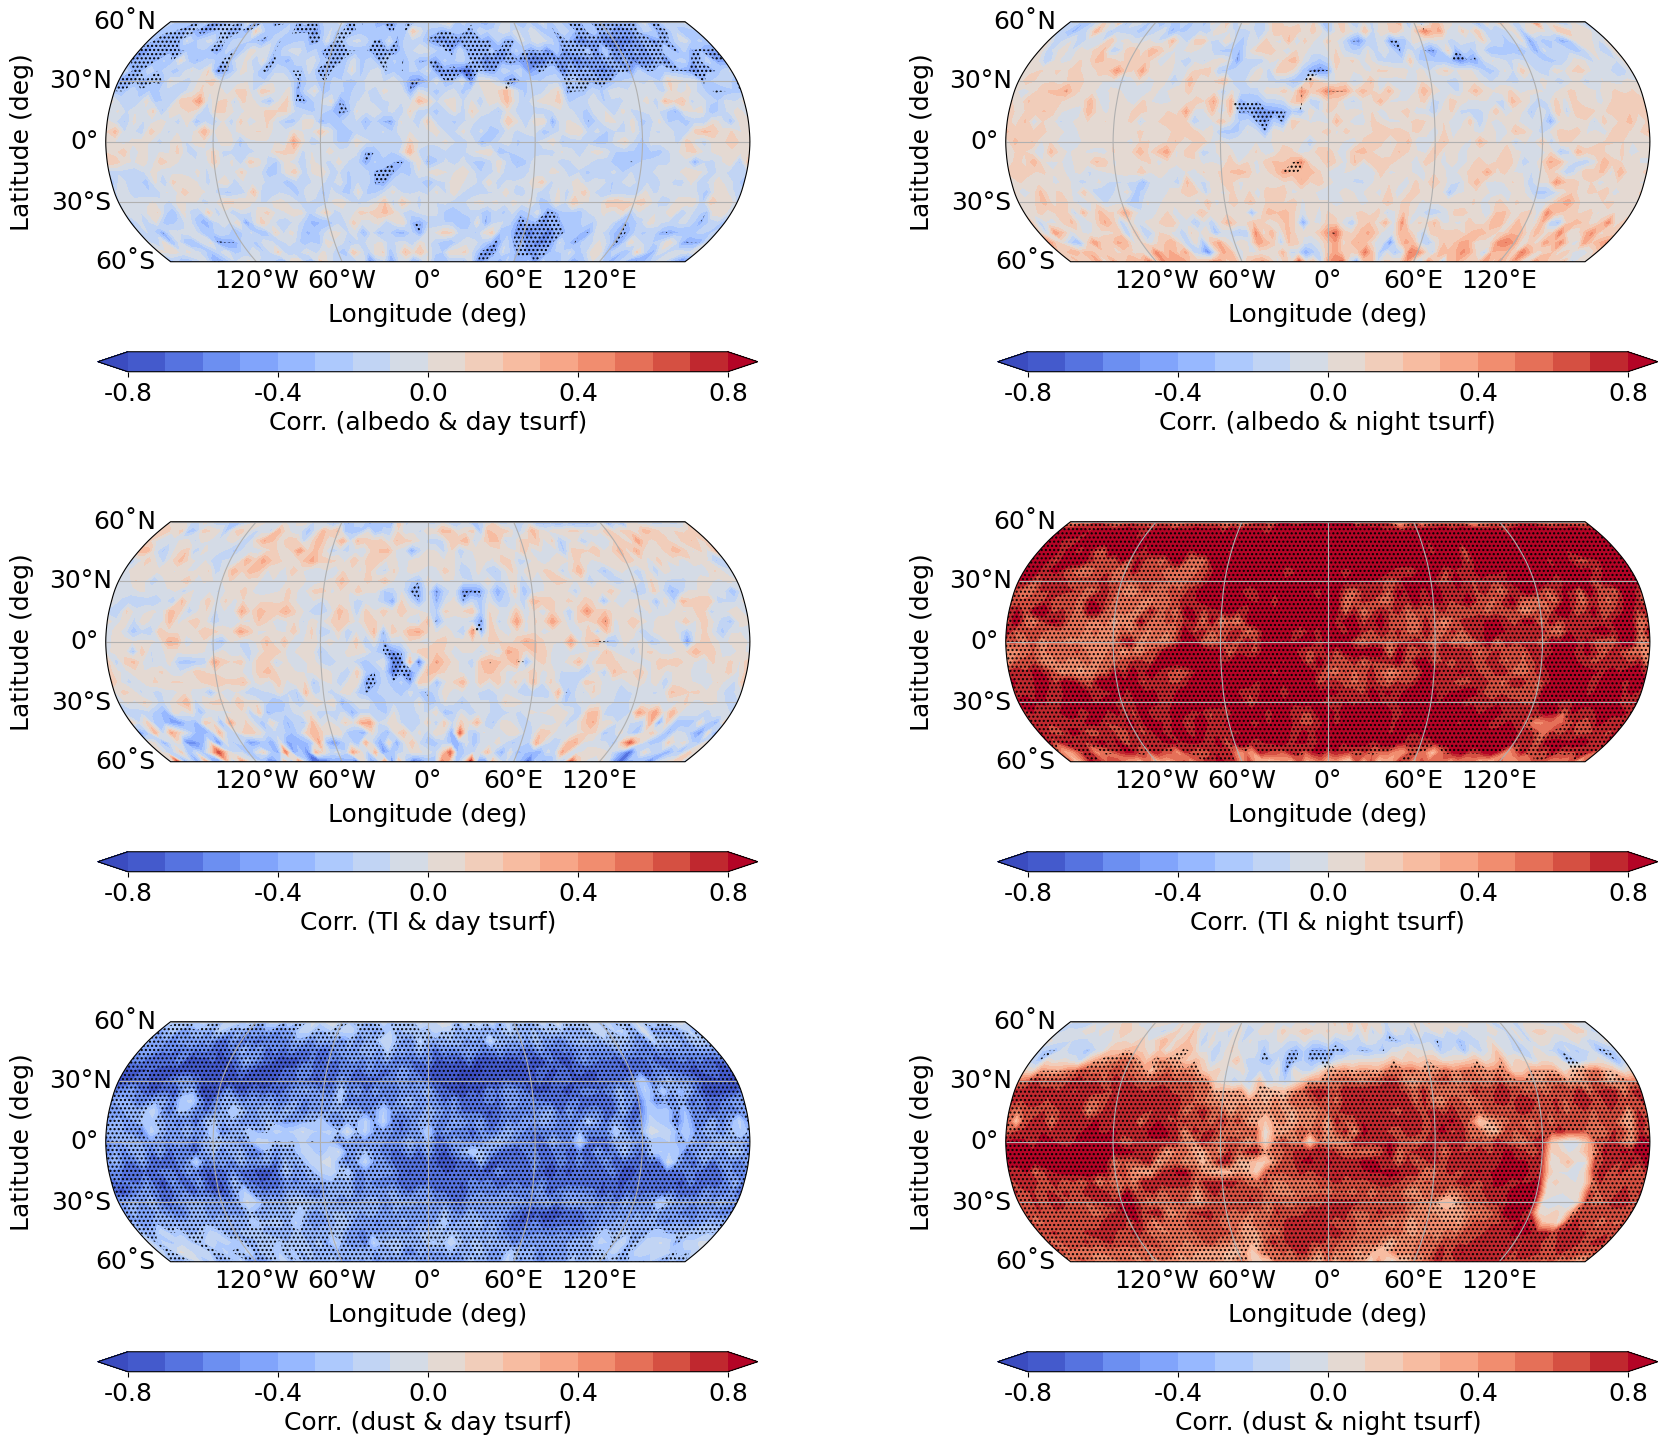

In [3]:
# Generate the 6 plots
fig = plt.figure(figsize=(20, 20))

# Define configurations for the 6 plots
# Format: (slope_key, pval_key, position, xlabel, filename)
# Adjust positions [left, bottom, width, height] to arrange them on one page
# Rows: Alb, Tau, TI. Cols: Day, Night (or Night, Day depending on preference)

plot_configs = [
    ('alb_day',   [0.1, 0.75, 0.4, 0.12], 'Corr. (albedo & day tsurf)',   'Fig5_cc_spatial_alb_day'),
    ('alb_night', [0.55, 0.75, 0.4, 0.12], 'Corr. (albedo & night tsurf)', 'Fig5_cc_spatial_alb_night'),
    
    ('ti_day',    [0.1, 0.50, 0.4, 0.12], 'Corr. (TI & day tsurf)',       'Fig5_cc_spatial_ti_day'),
    ('ti_night',  [0.55, 0.50, 0.4, 0.12], 'Corr. (TI & night tsurf)',     'Fig5_cc_spatial_ti_night'),
    
    ('tau_day',   [0.1, 0.25, 0.4, 0.12], 'Corr. (dust & day tsurf)',     'Fig5_cc_spatial_tau_day'),
    ('tau_night', [0.55, 0.25, 0.4, 0.12], 'Corr. (dust & night tsurf)',   'Fig5_cc_spatial_tau_night'),
    
]

for slope_key, pos, xlabel, fname in plot_configs:
    plot_single_panel(fig, data[f'slope_{slope_key}'], data[f'pval_{slope_key}'], pos, xlabel, fname)

plt.show()

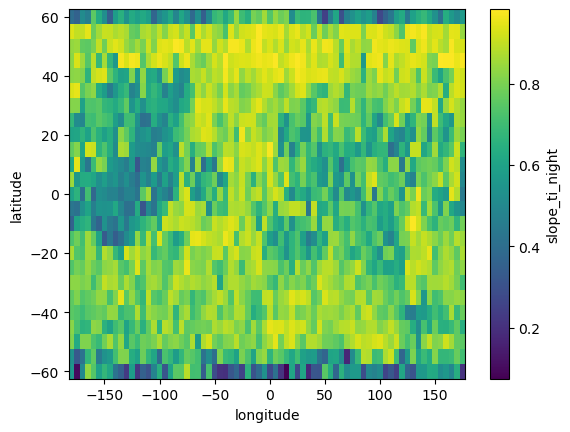

In [4]:
data[f'slope_ti_night'].plot()